<a href="https://colab.research.google.com/github/XTWLP/CNN/blob/master/%E5%9B%BE%E5%83%8F%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import torch as t
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage
show = ToPILImage() #可以将Tensor转成Image，方便可视化

In [39]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
trainset = tv.datasets.CIFAR10(root='/home/cy/data/',
                               train=True,
                               download=True,
                               transform=transform)
trainloader = t.utils.data.DataLoader(trainset,
                                      batch_size=4,
                                      shuffle=True,
                                      num_workers=2)
testset = tv.datasets.CIFAR10(root='/home/cy/data/',
                              train=False,
                              download=True,
                              transform=transform)
testloader = t.utils.data.DataLoader(trainset,
                                      batch_size=4,
                                      shuffle=False,
                                      num_workers=2)
classes = ('plane','car','bird','cat',
           'deer','dog','frog','house','ship','truck')

Files already downloaded and verified
Files already downloaded and verified


In [44]:
trainset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /home/cy/data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

ship


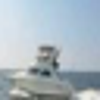

In [40]:
(data, label) = trainset[100]
print(classes[label])

show((data + 1) / 2).resize((100,100))

        deer         dog       plane       plane


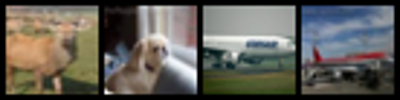

In [41]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(''.join('%12s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

In [51]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(3, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
  def forward(self, x):
    x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
    x = F.max_pool2d(F.relu(self.conv2(x)),2)
    x = x.view(x.size()[0],-1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [52]:
from torch import optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.01,momentum=0.9)

In [69]:
for epoch in range(2):
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data
    #inputs, labels = Variable(inputs), Variable(labels)

    optimizer.zero_grad()

    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()

    optimizer.step()

    running_loss += loss.data
    if i%2000 == 1999:
      print('[%d, %5d] loss: %.3f'\
            %(epoch+1,i+1,running_loss/2000))
      running_loss = 0.0
print('Finshed Training')

[1,  2000] loss: 1.939
[1,  4000] loss: 1.944
[1,  6000] loss: 1.952
[1,  8000] loss: 1.924
[1, 10000] loss: 1.929
[1, 12000] loss: 1.953
[2,  2000] loss: 1.932
[2,  4000] loss: 1.931
[2,  6000] loss: 1.936
[2,  8000] loss: 1.941
[2, 10000] loss: 1.943
[2, 12000] loss: 1.947
Finshed Training
